# 聚类分析

In [1]:
import numpy
from scipy.spatial.distance import cdist

def simple_kmeans(x, n_clusters, n_iter):
    # 随机选取初始类中心点
    idx = numpy.random.choice(len(x), n_clusters, replace=False)
    centers = x[idx,:]
    # 开始迭代
    for _ in range(n_iter): 
        # 采用cdist函数快速计算每个点到类中心的欧氏距离
        distances = cdist(x, centers, metric='euclidean')
        # 根据到类中心的距离进行分类
        labels = distances.argmin(axis=1)
        # 更新的类中心
        for idx in range(n_clusters):
            cluster_data = x[labels==idx]
            if cluster_data.shape[0] < 1: continue
            # 选取属于该类中心的数据
            # 将其均值作为新的类中心
            centers[idx,:] = cluster_data.mean(axis=0)
    return labels, centers 

# 采用随机数据测试KMeans算法
labels,centers = simple_kmeans(numpy.random.rand(6,2), 2, 10)
print(labels)
# 输出样例：[0 0 1 1 0 0]
print(centers)
# 输出样例：[[0.23, 0.51]
#           [0.75, 0.55]]


[0 1 0 0 0 1]
[[0.47470072 0.11980875]
 [0.52998011 0.91560299]]


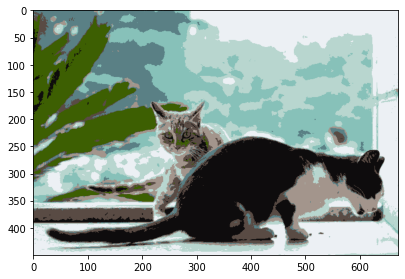

In [4]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import patches

# 读取图像
img = plt.imread('data/test.jpg')
# 提取像素作为聚类输入
pixels = numpy.array(numpy.reshape(img, (-1,3)), dtype=numpy.float64)
# 将像素用Kmeans聚类为8类
labels,centers = simple_kmeans(pixels, n_clusters=8, n_iter=100)

# 用8种颜色重建图片
new_img = numpy.zeros(img.shape)
label_index = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i][j] = centers[labels[label_index]]
        label_index += 1
new_img = numpy.array(new_img, dtype=numpy.uint8)
fig = plt.figure(figsize=(6.7,4.5))
plt.imshow(new_img)

(450, 672, 3)


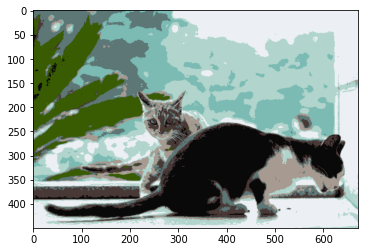

In [7]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy
from sklearn.cluster import KMeans

# 读取图像
img = plt.imread('data/test.jpg')
print(img.shape)
# 随机取1000个像素
pixels = numpy.array(numpy.reshape(img, (-1,3)), dtype=numpy.float64)
sample_pixels = shuffle(pixels)[:1000]

# 将像素用Kmeans聚类为8类
n_colors = 8
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(sample_pixels)
# 计算图片中所有像素属于哪一类
labels = kmeans.predict(pixels)

# 用8种颜色重建图片
new_img = numpy.zeros(img.shape)
label_index = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i][j] = kmeans.cluster_centers_[labels[label_index]]
        label_index += 1
new_img = numpy.array(new_img, dtype=numpy.uint8)
plt.imshow(new_img)